In [1]:
import os
import pandas as pd

In [2]:
# Define the path to the main train folder
main_train_folder = 'train/train'

In [3]:
# Initialize lists to store the image locations and their classes
image_locations = []
image_classes = []

In [4]:
from tqdm import tqdm

In [5]:
# Walk through the directory structure
for root, dirs, files in os.walk(main_train_folder):
    for file in tqdm(files):
        if file.endswith(('png', 'jpg', 'jpeg')):  # Add other image file extensions if needed
            image_path = os.path.join(root, file)
            class_name = os.path.basename(root)
            image_locations.append(image_path)
            image_classes.append(class_name)

100%|█████████████████████████████████████| 492/492 [00:00<00:00, 611255.20it/s]


In [6]:
# Create the DataFrame
data = {
    'location': image_locations,
    'class': image_classes
}

In [7]:
df = pd.DataFrame(data)

In [8]:
df

location      class
0      train/train/Blueberry/Blueberry_176.jpg  Blueberry
1      train/train/Blueberry/Blueberry_162.jpg  Blueberry
2      train/train/Blueberry/Blueberry_189.jpg  Blueberry
3      train/train/Blueberry/Blueberry_348.jpg  Blueberry
4       train/train/Blueberry/Blueberry_59.jpg  Blueberry
...                                        ...        ...
16849          train/train/Peach/Peach_313.jpg      Peach
16850          train/train/Peach/Peach_475.jpg      Peach
16851          train/train/Peach/Peach_461.jpg      Peach
16852          train/train/Peach/Peach_307.jpg      Peach
16853          train/train/Peach/Peach_449.jpg      Peach

[16854 rows x 2 columns]

In [10]:
import matplotlib.pyplot as plt

In [16]:
class_counts = df['class'].value_counts()

In [17]:
class_counts

Grape Blue            984
Tomato                738
Pear                  696
Pepper Red            666
Apple Braeburn        492
Cantaloupe            492
Apple Granny Smith    492
Cherry                492
Peach                 492
Papaya                492
Lemon                 492
Pomegranate           492
Strawberry            492
Apricot               492
Limes                 490
Passion Fruit         490
Cactus fruit          490
Clementine            490
Mango                 490
Pineapple             490
Raspberry             490
Banana                490
Orange                479
Watermelon            475
Kiwi                  466
Blueberry             462
Corn                  450
Potato Red            450
Plum                  447
Pepper Green          444
Onion White           438
Avocado               427
Cucumber Ripe         392
Name: class, dtype: int64

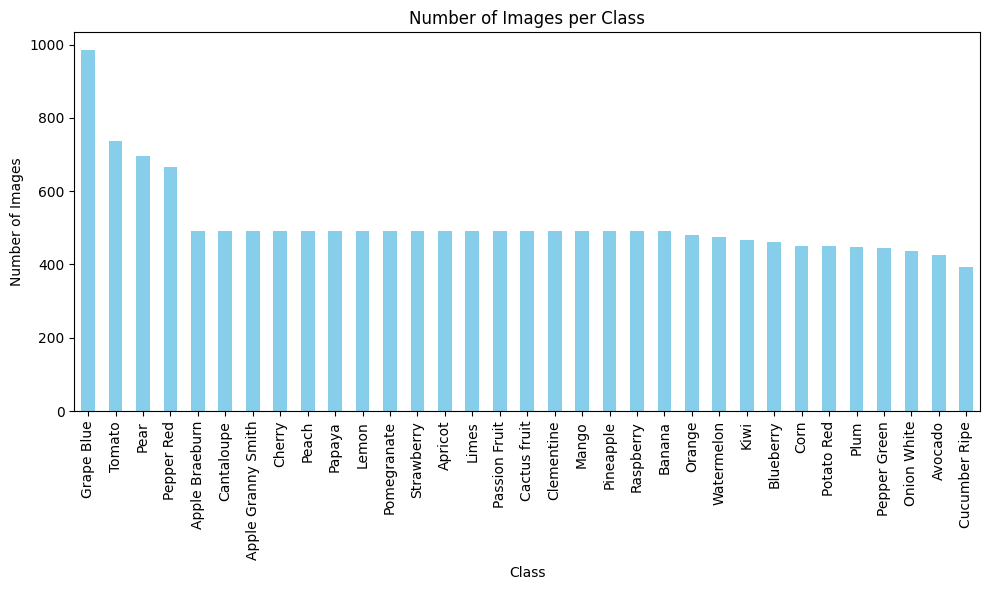

In [18]:
# Plot the vertical bar graph
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

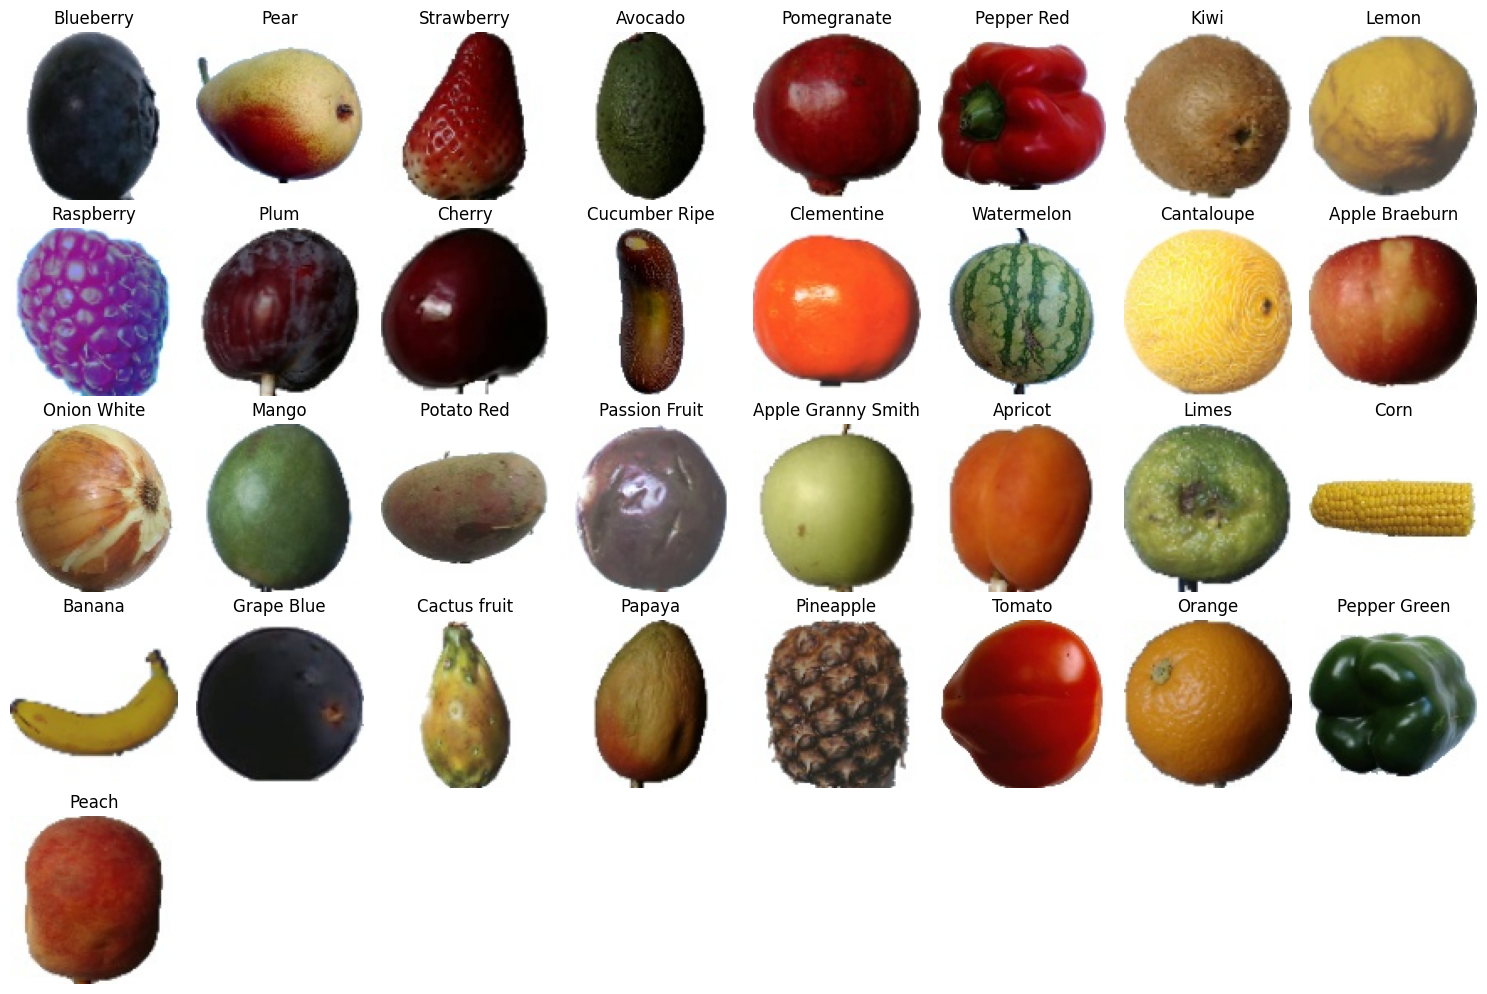

In [47]:

unique_classes = df['class'].unique()
num_classes = len(unique_classes)

plt.figure(figsize=(15, 10))

# Plot 2 images from each class
image_index = 0
for cls in unique_classes:
    sample_images = df[df['class'] == cls].sample(1)
    for img_path in sample_images['location']:
        plt.subplot(5, 8, image_index + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
        image_index += 1

plt.tight_layout()
plt.show()

         width   height  aspect_ratio
count  16854.0  16854.0       16854.0
mean     100.0    100.0           1.0
std        0.0      0.0           0.0
min      100.0    100.0           1.0
25%      100.0    100.0           1.0
50%      100.0    100.0           1.0
75%      100.0    100.0           1.0
max      100.0    100.0           1.0


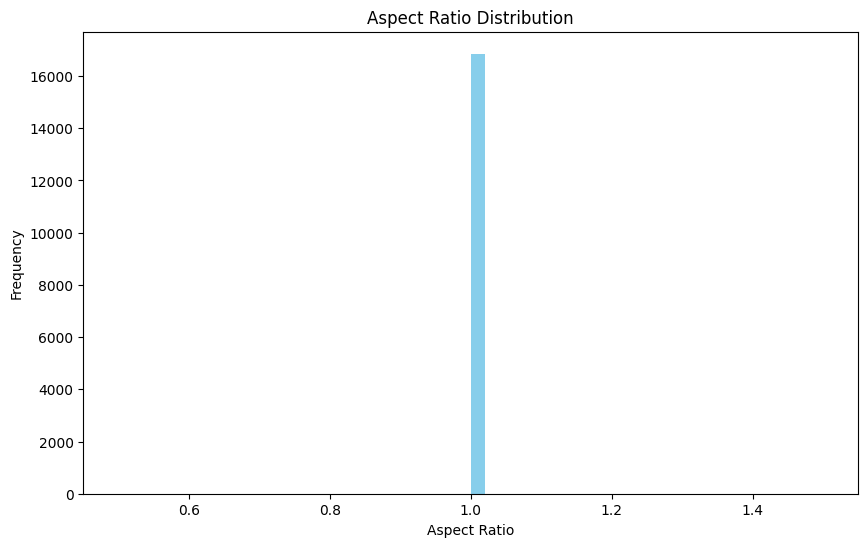

In [21]:
from PIL import Image

widths = []
heights = []
aspect_ratios = []

for img_path in df['location']:
    img = Image.open(img_path)
    width, height = img.size
    widths.append(width)
    heights.append(height)
    aspect_ratios.append(width / height)

dimensions_df = pd.DataFrame({
    'width': widths,
    'height': heights,
    'aspect_ratio': aspect_ratios
})

print(dimensions_df.describe())

plt.figure(figsize=(10, 6))
plt.hist(dimensions_df['aspect_ratio'], bins=50, color='skyblue')
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()


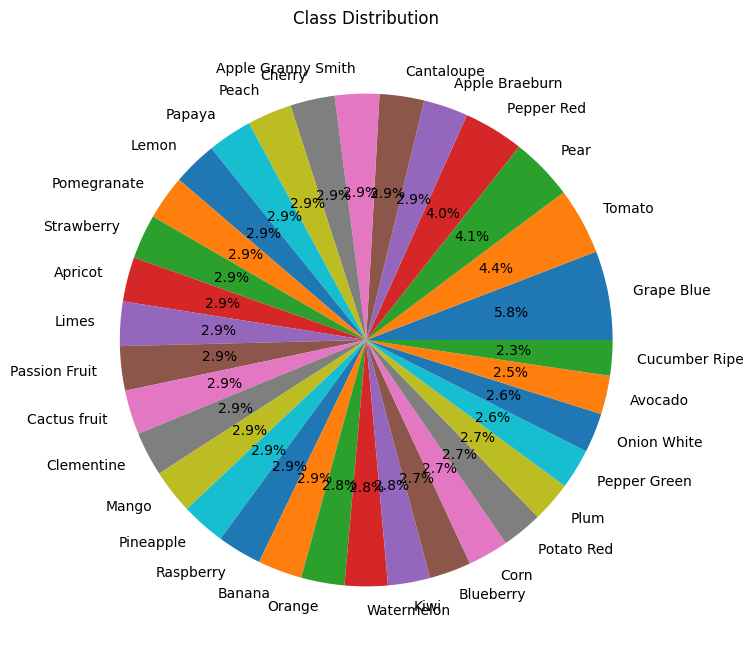

In [22]:
class_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


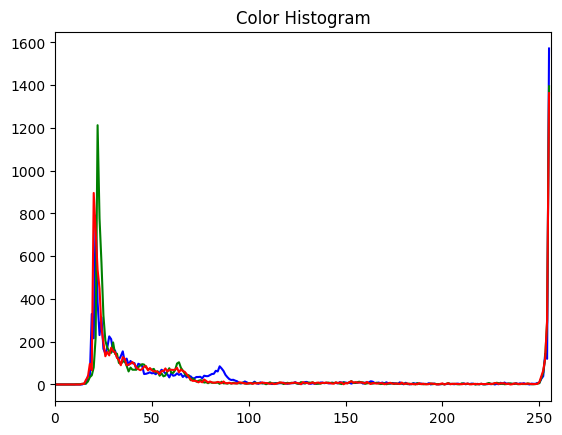

In [23]:
import cv2
import numpy as np

def plot_color_histogram(image_path):
    img = cv2.imread(image_path)
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    plt.title('Color Histogram')
    plt.show()

sample_image_path = df['location'].sample(1).values[0]
plot_color_histogram(sample_image_path)


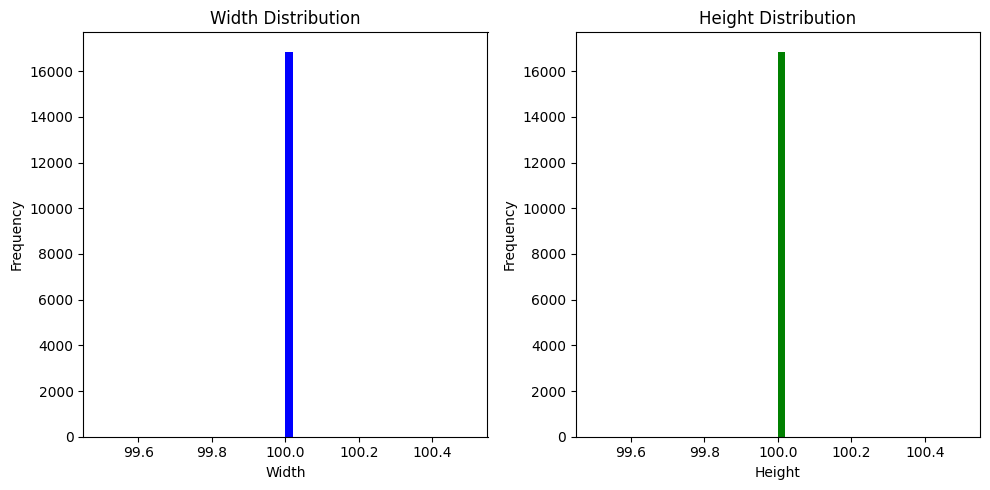

In [25]:
from PIL import Image

widths = []
heights = []

for img_path in df['location']:
    img = Image.open(img_path)
    width, height = img.size
    widths.append(width)
    heights.append(height)

dimensions_df = pd.DataFrame({
    'width': widths,
    'height': heights
})

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(dimensions_df['width'], bins=50, color='blue')
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(dimensions_df['height'], bins=50, color='green')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


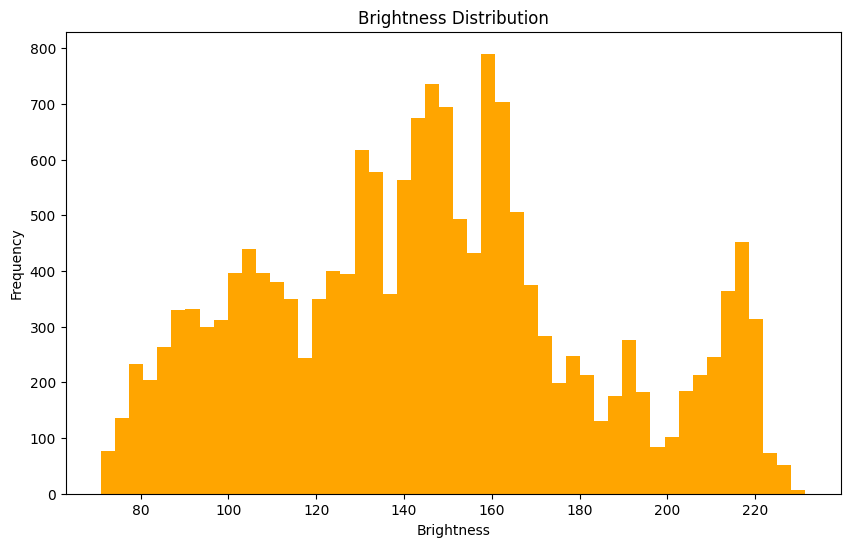

In [26]:
def calculate_brightness(image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    return np.mean(img)

brightness_values = [calculate_brightness(img) for img in df['location']]

plt.figure(figsize=(10, 6))
plt.hist(brightness_values, bins=50, color='orange')
plt.title('Brightness Distribution')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.show()


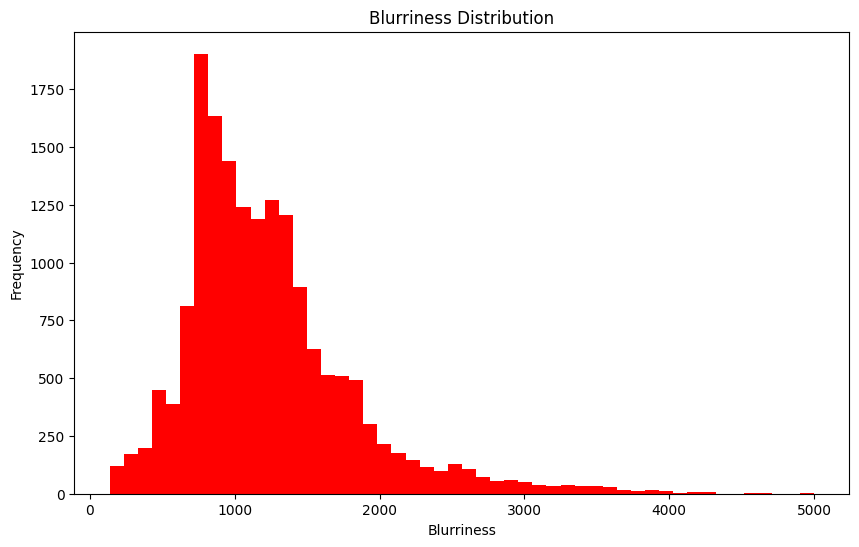

In [27]:
def calculate_blurriness(image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    return cv2.Laplacian(img, cv2.CV_64F).var()

blurriness_values = [calculate_blurriness(img) for img in df['location']]

plt.figure(figsize=(10, 6))
plt.hist(blurriness_values, bins=50, color='red')
plt.title('Blurriness Distribution')
plt.xlabel('Blurriness')
plt.ylabel('Frequency')
plt.show()


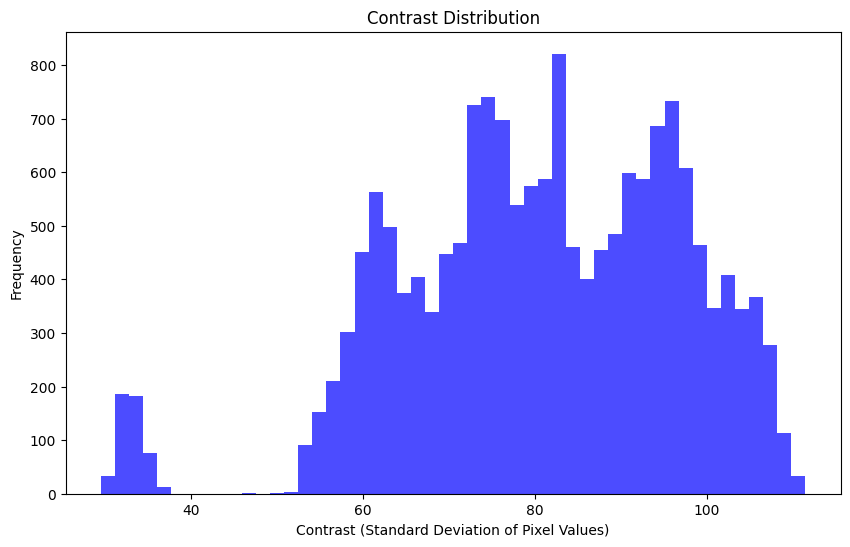

In [41]:
# Function to calculate contrast
def calculate_contrast(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return np.std(img)

# Calculate contrast for all images
contrast_values = [calculate_contrast(img) for img in df['location']]

# Plot the contrast distribution
plt.figure(figsize=(10, 6))
plt.hist(contrast_values, bins=50, color='blue', alpha=0.7)
plt.title('Contrast Distribution')
plt.xlabel('Contrast (Standard Deviation of Pixel Values)')
plt.ylabel('Frequency')
plt.show()

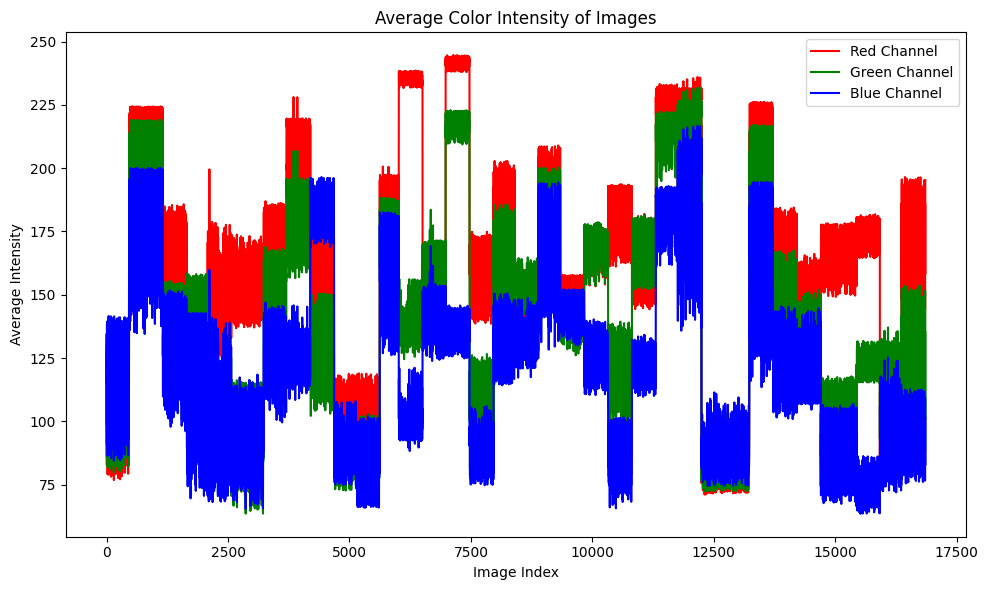

In [42]:
# Function to calculate average color intensity
def calculate_average_color(image_path):
    img = cv2.imread(image_path)
    avg_color_per_row = np.average(img, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)
    return avg_color

# Calculate average color intensity for all images
average_colors = np.array([calculate_average_color(img) for img in df['location']])

# Convert average colors to a DataFrame for easier plotting
average_colors_df = pd.DataFrame(average_colors, columns=['Blue', 'Green', 'Red'])

# Plot the average color intensity
plt.figure(figsize=(10, 6))

plt.plot(average_colors_df.index, average_colors_df['Red'], color='red', label='Red Channel')
plt.plot(average_colors_df.index, average_colors_df['Green'], color='green', label='Green Channel')
plt.plot(average_colors_df.index, average_colors_df['Blue'], color='blue', label='Blue Channel')

plt.title('Average Color Intensity of Images')
plt.xlabel('Image Index')
plt.ylabel('Average Intensity')
plt.legend()
plt.tight_layout()
plt.show()

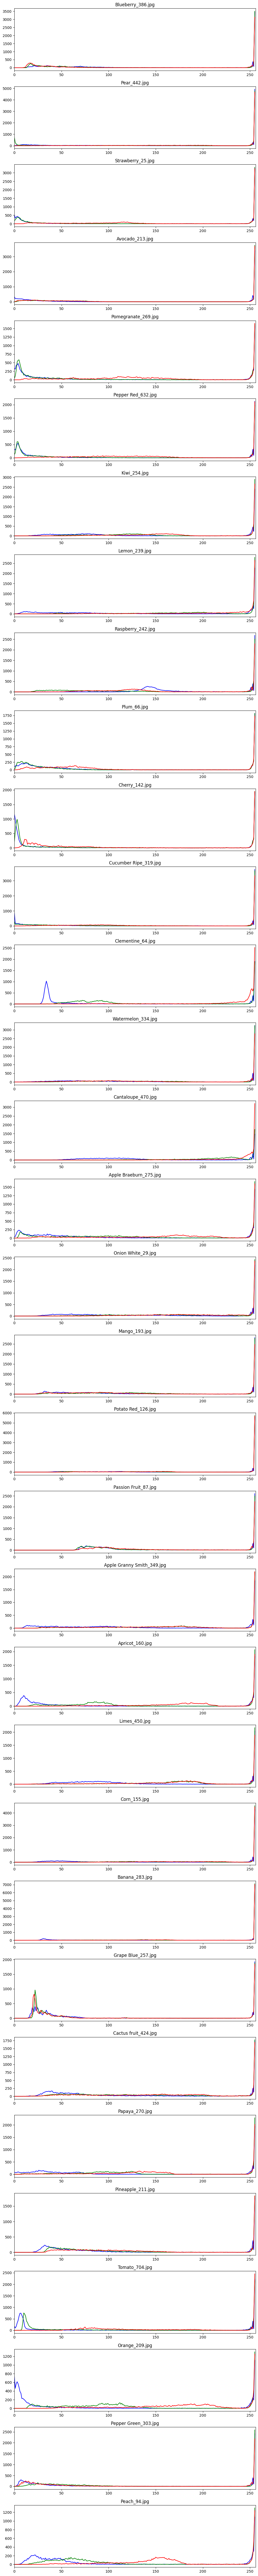

In [29]:
# Function to plot color histogram
def plot_color_histogram(image_path, ax):
    img = cv2.imread(image_path)
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([img], [i], None, [256], [0, 256])
        ax.plot(histr, color=col)
    ax.set_xlim([0, 256])
    ax.set_title(os.path.basename(image_path))

# Plot color histograms for each class
unique_classes = df['class'].unique()
num_classes = len(unique_classes)

fig, axes = plt.subplots(num_classes, 1, figsize=(10, num_classes * 3))

for i, cls in enumerate(unique_classes):
    sample_image_path = df[df['class'] == cls].sample(1).iloc[0]['location']
    plot_color_histogram(sample_image_path, axes[i])

plt.tight_layout()
plt.show()

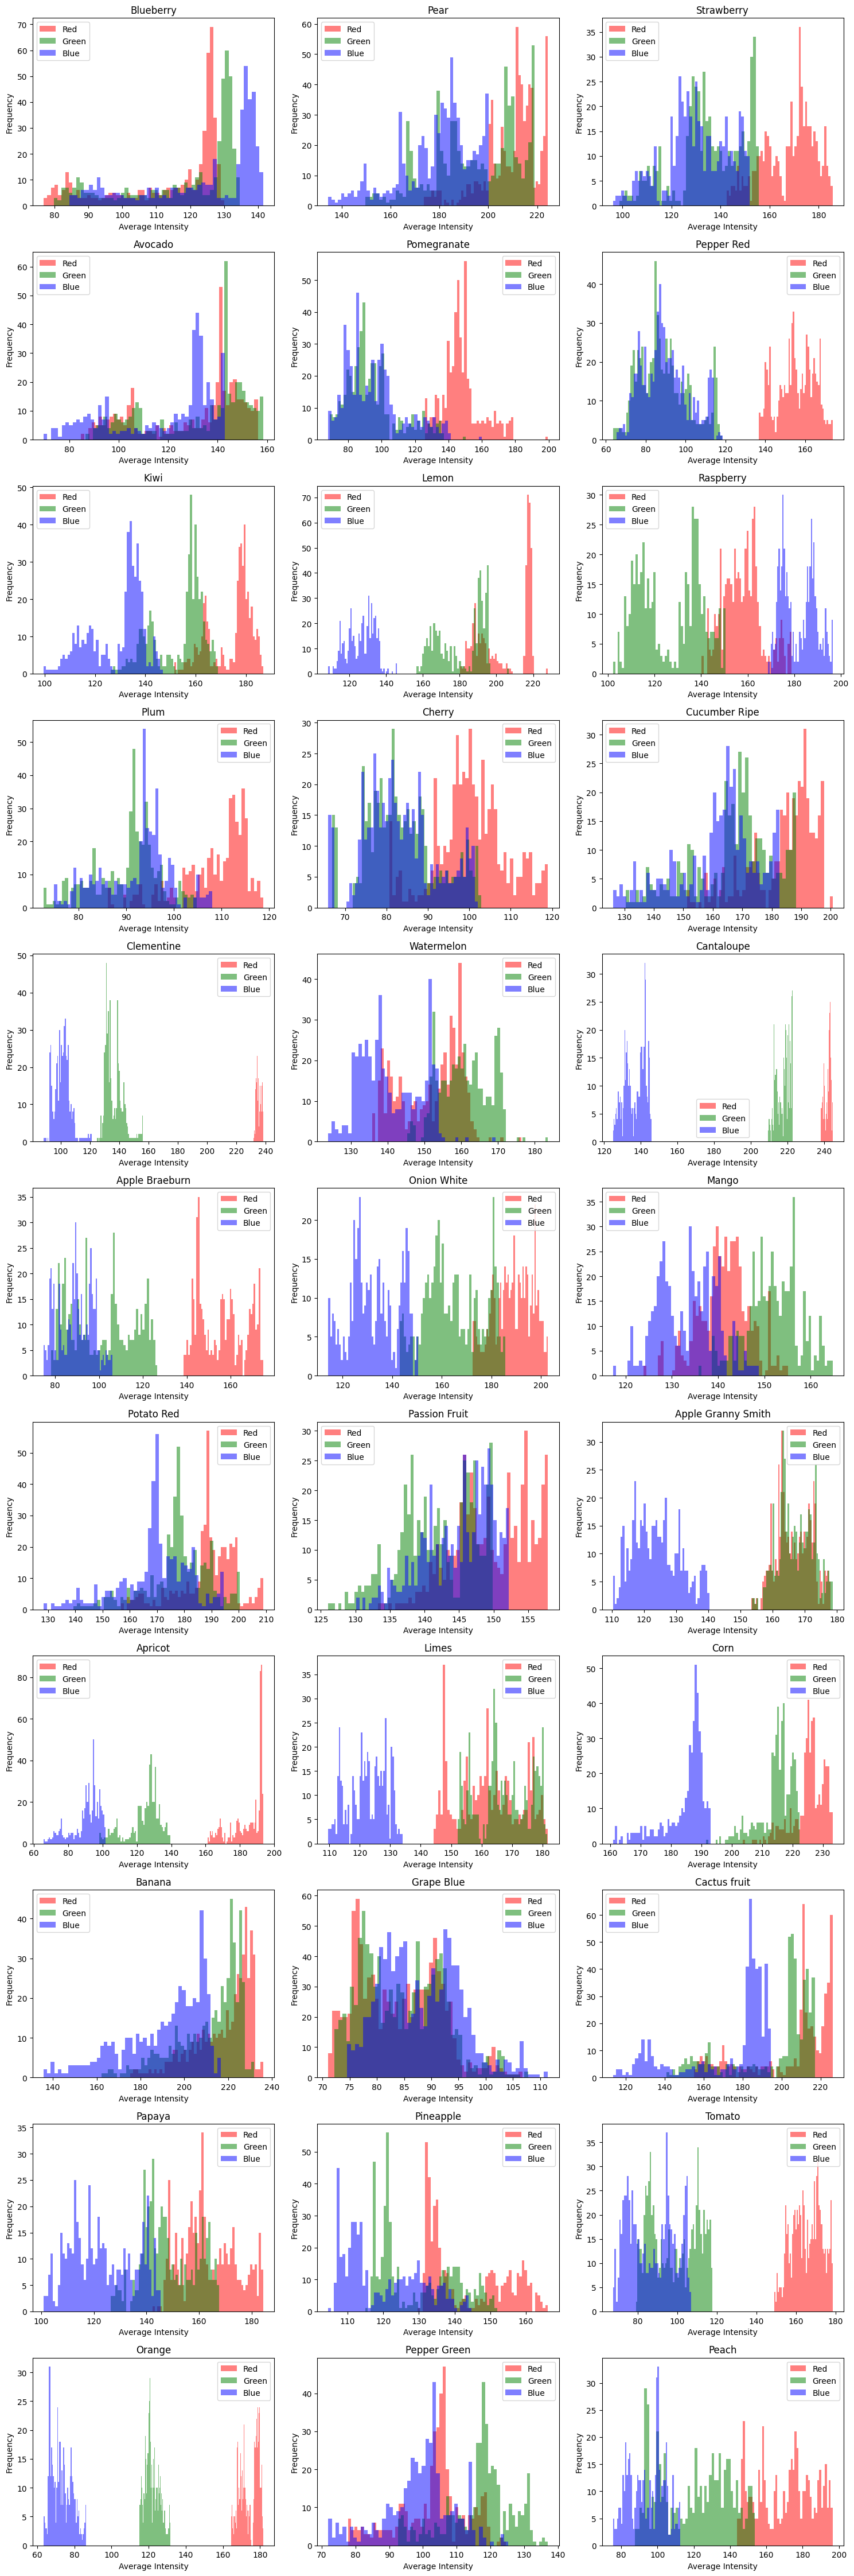

In [44]:
# Function to calculate average color intensity
def calculate_average_color(image_path):
    img = cv2.imread(image_path)
    avg_color_per_row = np.average(img, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)
    return avg_color

# Set up the subplot with 11 rows and 3 columns
fig, axes = plt.subplots(11, 3, figsize=(15, 45))

# Plot average color intensity histogram for each class
unique_classes = df['class'].unique()
num_classes = len(unique_classes)

for i, cls in enumerate(unique_classes):
    sample_images = df[df['class'] == cls]
    avg_colors = np.array([calculate_average_color(img) for img in sample_images['location']])
    
    row = i // 3
    col = i % 3
    
    axes[row, col].hist(avg_colors[:, 2], bins=50, color='red', alpha=0.5, label='Red')
    axes[row, col].hist(avg_colors[:, 1], bins=50, color='green', alpha=0.5, label='Green')
    axes[row, col].hist(avg_colors[:, 0], bins=50, color='blue', alpha=0.5, label='Blue')
    
    axes[row, col].set_title(cls)
    axes[row, col].set_xlabel('Average Intensity')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

# Hide any unused subplots
for j in range(num_classes, 11 * 3):
    row = j // 3
    col = j % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

## Class-Wise Mean Image

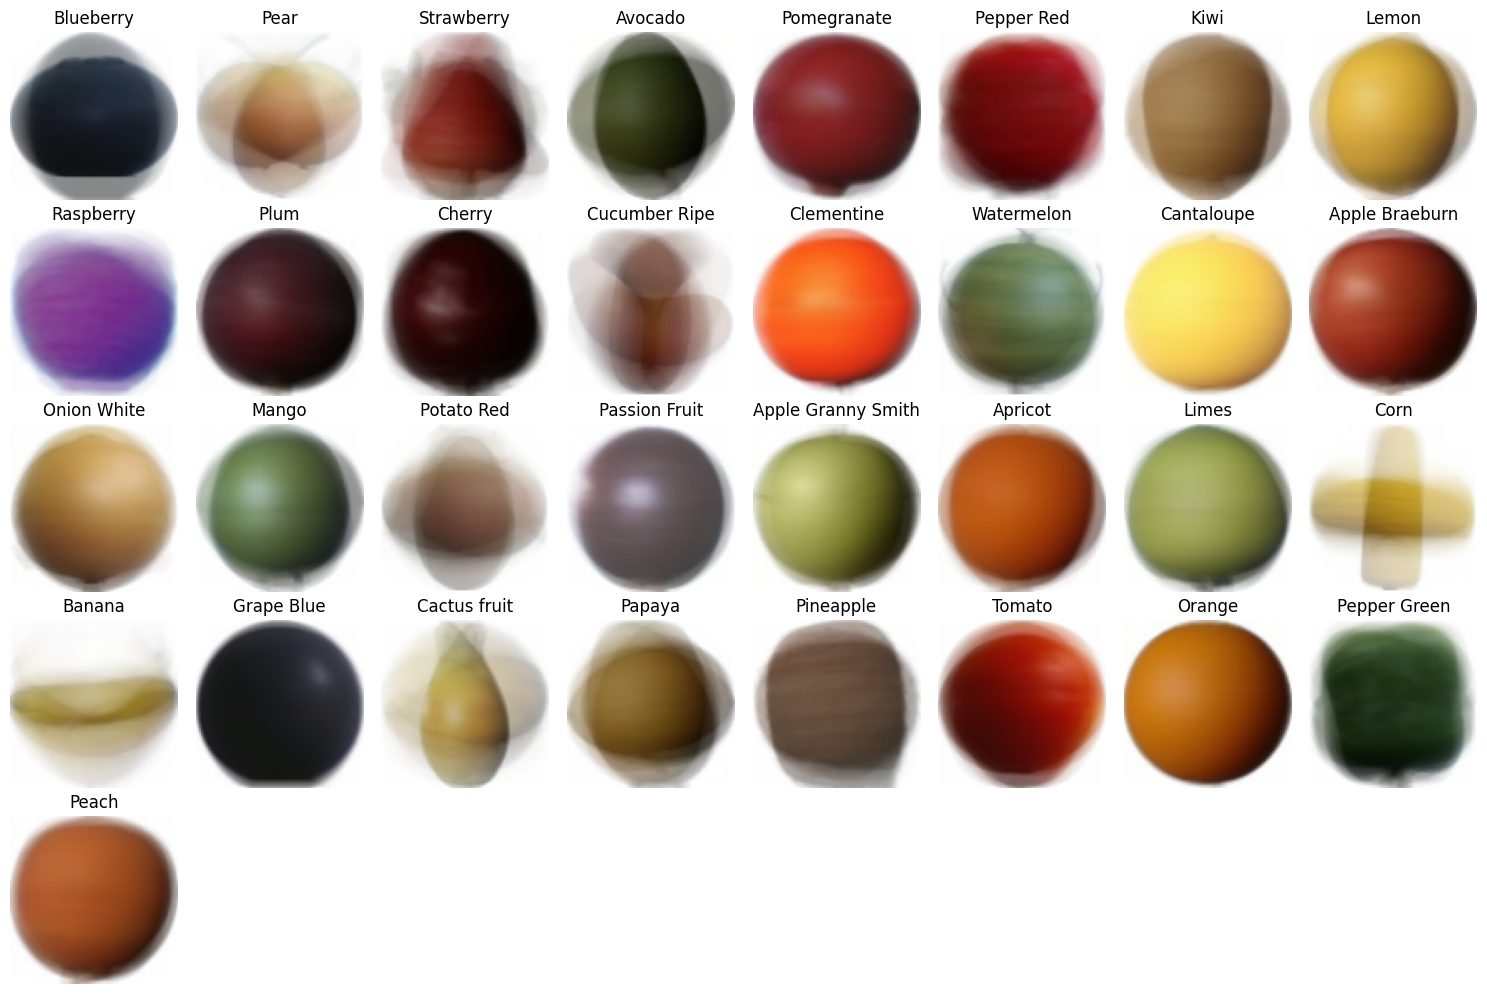

In [48]:
def compute_mean_image(image_paths):
    mean_img = None
    for img_path in image_paths:
        img = cv2.imread(img_path).astype(np.float32)
        if mean_img is None:
            mean_img = img
        else:
            mean_img += img
    mean_img /= len(image_paths)
    return mean_img.astype(np.uint8)

plt.figure(figsize=(15, 10))
for i, cls in enumerate(unique_classes):
    class_images = df[df['class'] == cls]['location']
    mean_img = compute_mean_image(class_images)
    plt.subplot(5, 8, i + 1)
    plt.imshow(cv2.cvtColor(mean_img, cv2.COLOR_BGR2RGB))
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Edge Detection Analysis

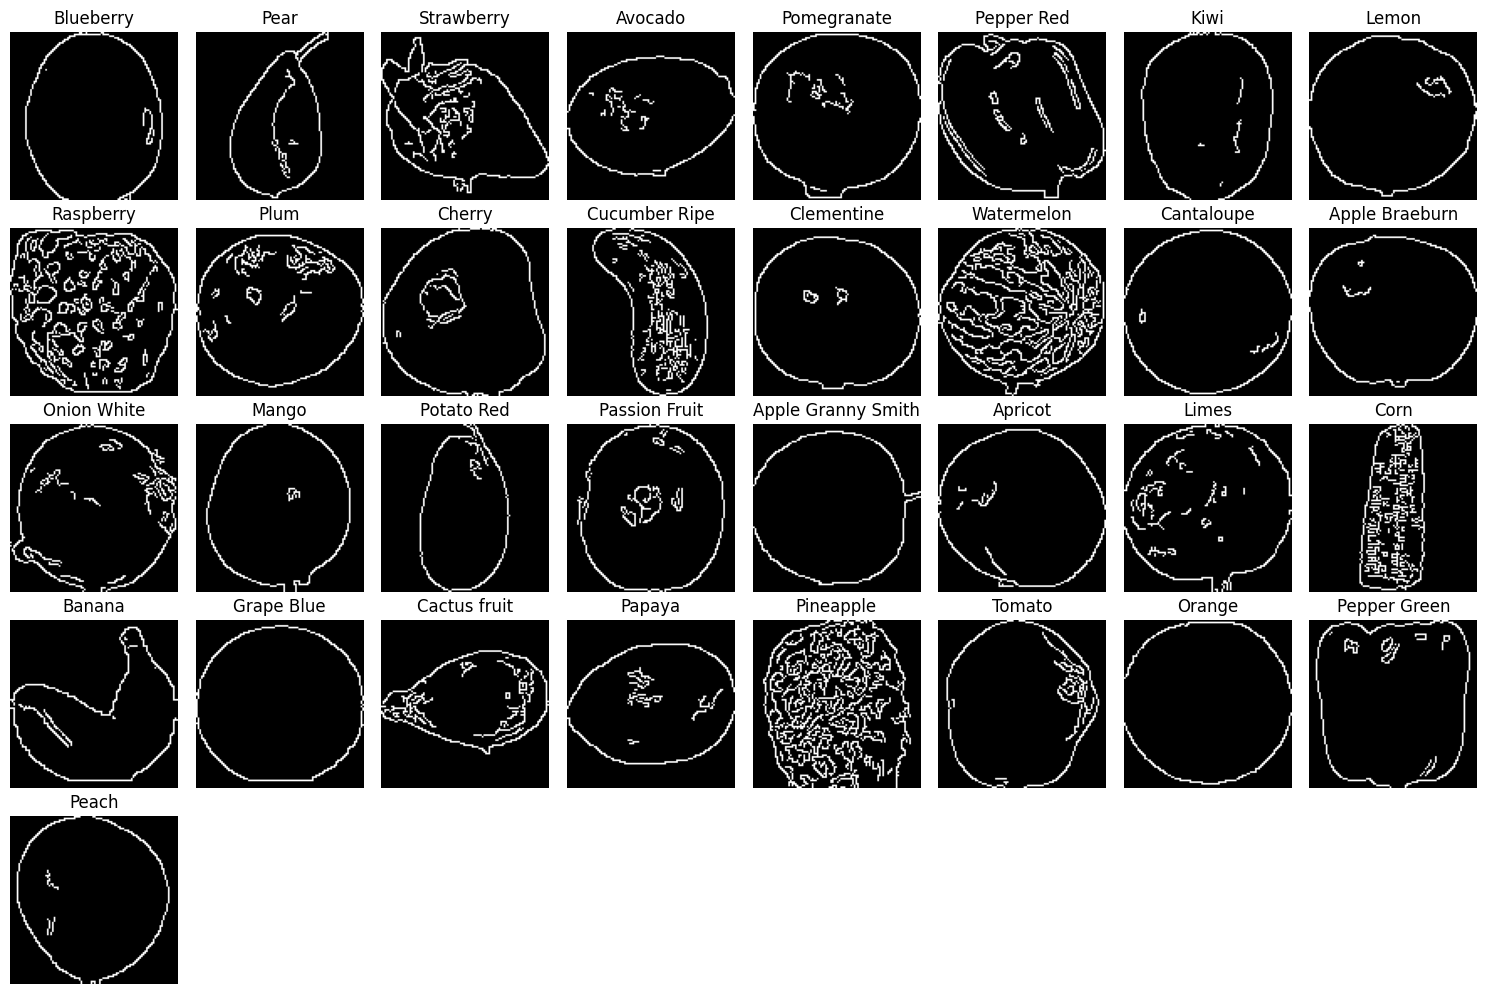

In [49]:
plt.figure(figsize=(15, 10))
for i, cls in enumerate(unique_classes):
    sample_image_path = df[df['class'] == cls].sample(1).iloc[0]['location']
    img = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 100, 200)
    plt.subplot(5, 8, i + 1)
    plt.imshow(edges, cmap='gray')
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()


### Spatial Distribution of Colors

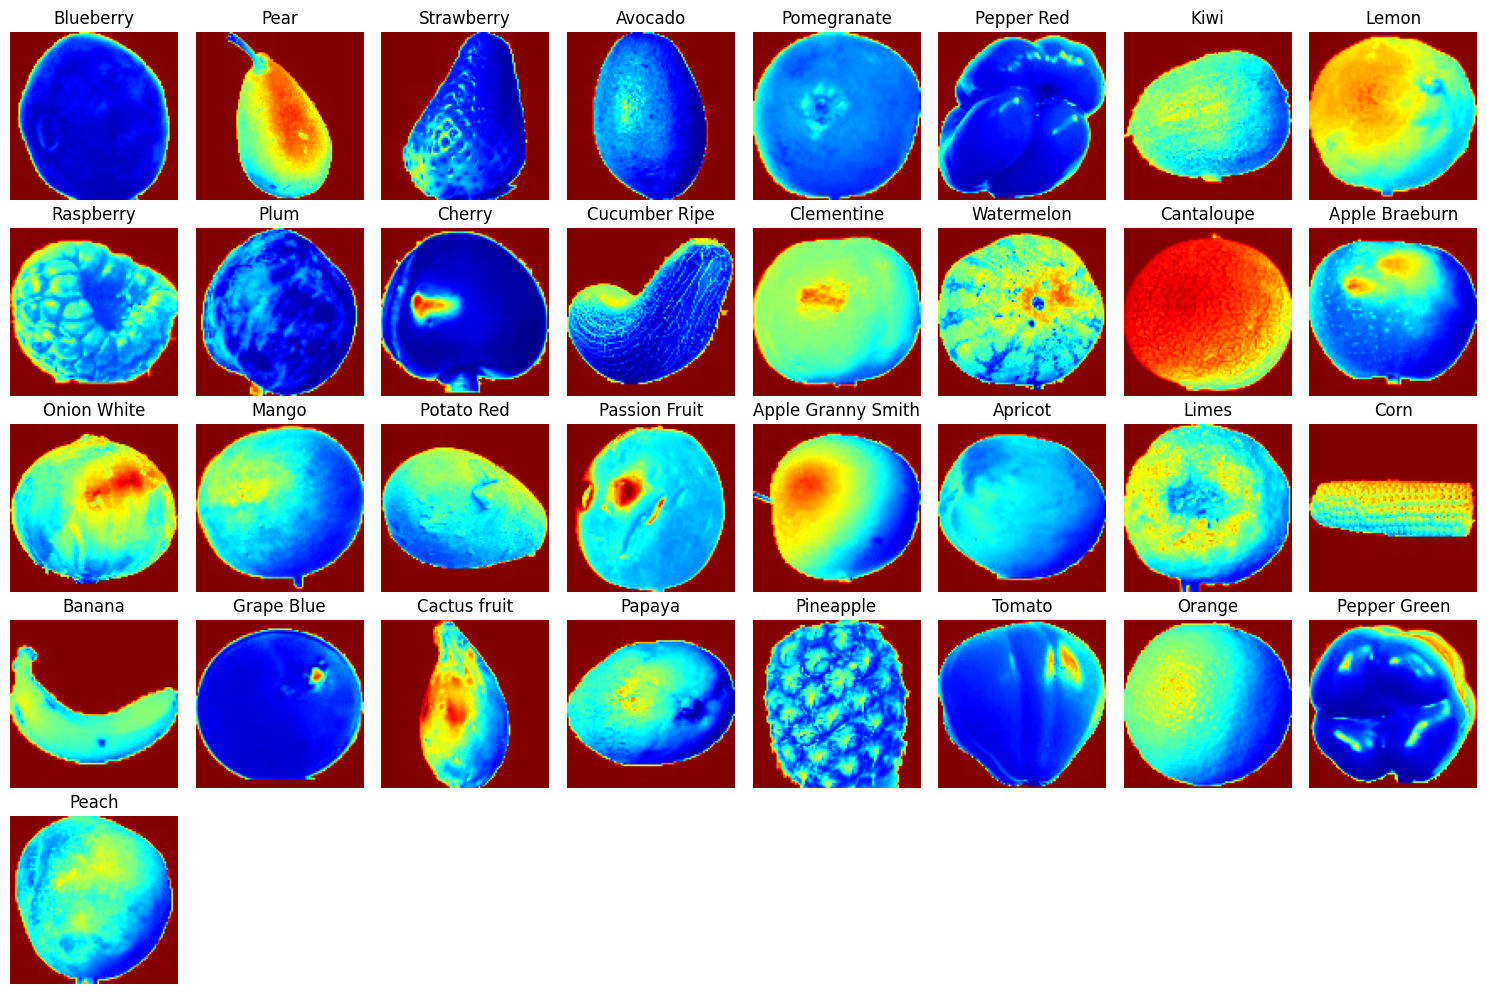

In [50]:
plt.figure(figsize=(15, 10))
for i, cls in enumerate(unique_classes):
    sample_image_path = df[df['class'] == cls].sample(1).iloc[0]['location']
    img = cv2.imread(sample_image_path)
    heatmap = cv2.applyColorMap(img, cv2.COLORMAP_JET)
    plt.subplot(5, 8, i + 1)
    plt.imshow(cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB))
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()
